In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_train[:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

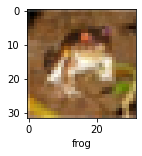

In [10]:
plot_sample(X_train,y_train,0)

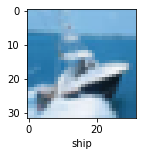

In [11]:
plot_sample(X_train,y_train,8)

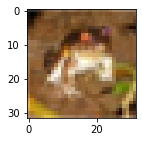

In [12]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])

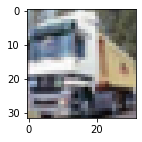

In [13]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[1])

In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.8149 - accuracy: 0.3518
Epoch 2/10
1563/1563 [==============================] - 77s 50ms/step - loss: 1.6265 - accuracy: 0.4254
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.5434 - accuracy: 0.4544
Epoch 4/10
1563/1563 [==============================] - 74s 48ms/step - loss: 1.4845 - accuracy: 0.4761
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.4346 - accuracy: 0.4936
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.3902 - accuracy: 0.5123
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.3526 - accuracy: 0.5261
Epoch 8/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.3182 - accuracy: 0.5372
Epoch 9/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.2876 - accuracy: 0.5513
Epoch 10/10
1563/1563 [==============================] - 69s 44m

In [16]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 1.3880 - accuracy: 0.5125


[1.3880165815353394, 0.512499988079071]

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.60      0.58      1000
           1       0.70      0.60      0.64      1000
           2       0.44      0.38      0.41      1000
           3       0.38      0.26      0.31      1000
           4       0.58      0.29      0.38      1000
           5       0.45      0.41      0.43      1000
           6       0.60      0.55      0.57      1000
           7       0.36      0.82      0.50      1000
           8       0.66      0.66      0.66      1000
           9       0.61      0.56      0.58      1000

    accuracy                           0.51     10000
   macro avg       0.53      0.51      0.51     10000
weighted avg       0.53      0.51      0.51     10000



In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
]) 

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.4507 - accuracy: 0.4806
Epoch 2/10
1563/1563 [==============================] - 34s 21ms/step - loss: 1.1129 - accuracy: 0.6100
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9884 - accuracy: 0.6574
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9093 - accuracy: 0.6833
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8486 - accuracy: 0.7040
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7901 - accuracy: 0.7268
Epoch 7/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7414 - accuracy: 0.7420
Epoch 8/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.6976 - accuracy: 0.7591
Epoch 9/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6564 - accuracy: 0.7710
Epoch 10/10
1563/1563 [==============================] - 35s 23m

In [21]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9739 - accuracy: 0.6844


[0.9739260673522949, 0.6844000220298767]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.6936468e-03, 4.3325483e-05, 8.4156413e-03, 9.7338730e-01,
        2.0565278e-06, 9.5835933e-03, 2.5677385e-03, 4.3768828e-06,
        4.2646565e-03, 3.7444017e-05],
       [2.7442900e-02, 3.3977863e-01, 3.1974905e-06, 6.4166867e-05,
        1.7884098e-08, 4.9626387e-08, 1.3551169e-08, 4.6547349e-08,
        6.0632801e-01, 2.6383024e-02],
       [1.6589412e-02, 7.5489563e-01, 1.1181366e-04, 5.4463209e-03,
        1.2305715e-05, 3.2515821e-04, 1.5668852e-06, 8.6488631e-05,
        2.0224462e-01, 2.0286631e-02],
       [7.2956920e-01, 8.1187919e-02, 8.8331476e-03, 1.2843478e-03,
        8.3944225e-04, 2.6802375e-04, 8.6653270e-03, 1.3575071e-03,
        1.6675584e-01, 1.2392666e-03],
       [2.7053834e-06, 1.5357869e-05, 8.0997318e-02, 1.3573958e-01,
        7.9466484e-02, 9.8602539e-03, 6.9383925e-01, 7.1248946e-06,
        7.0600872e-05, 1.3274008e-06]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [24]:
y_test = y_test.reshape(-1,)

In [25]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

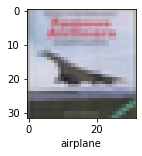

In [26]:
plot_sample(X_test,y_test,3)

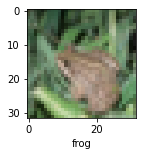

In [27]:
plot_sample(X_test,y_test,4)